<H1><b><center>  Flight Delay Prediction Using Machine Learning Project </h1></b> </center>


<h3><b> Import Libraries: </h3></b>

In [65]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings("ignore")


<h3><b>Importing dataset: </h3></b>



In [66]:
df = pd.read_csv('M1_final.csv')

<h3><b> Data Overview: </h3></b>

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [68]:
df.shape

(28820, 23)

In [69]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


 <h3><b> Data Preprocessing: </h3></b>

*   Handling Missing Values
*   Check Duplicates Values
*   Data formatting
*   Feature Engineering

*  <b> Handling Missing Values </b>

In [70]:
print("Null Values:", df.isnull().sum())
df.dropna(inplace=True)

Null Values: MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64


In [71]:
print("Null Values:", df.isnull().sum())

Null Values: MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64


*  <b> Correlation matrix  </b>

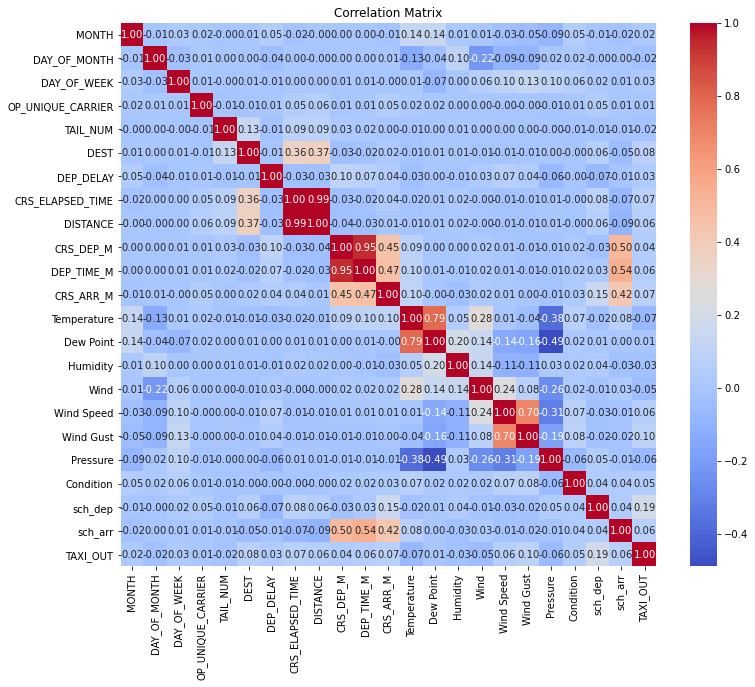

In [72]:
# Make a copy of the dataset to avoid modifying the original dataset
encoded_dataset = df.copy()

# Encode categorical columns
label_encoders = {}
for col in ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Wind', 'Condition']:
    label_encoders[col] = LabelEncoder()
    encoded_dataset[col] = label_encoders[col].fit_transform(df[col])

# Calculate the correlation matrix
corr_matrix = encoded_dataset.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [73]:
# Drop 'TAIL_NUM' column
df.drop('TAIL_NUM', axis=1, inplace=True)

*  <b> Check Duplicates Values </b>

In [74]:
df["Dew Point"] = df["Dew Point"].astype("int64")

# Let's check if this fixed it.
df.select_dtypes(["object_"]).head()

,OP_UNIQUE_CARRIER,DEST,Wind,Condition
0,B6,CHS,W,Fair / Windy
1,B6,LAX,W,Fair / Windy
2,B6,FLL,W,Fair / Windy
3,B6,MCO,W,Fair / Windy
4,DL,ATL,W,Fair / Windy


In [75]:
# Count the number of duplicated rows
print("Number of duplicated rows:",df.duplicated().sum() )

Number of duplicated rows: 0


*  <b> Data formatting</b>

In [76]:
new_column_names = {
    'MONTH': 'Month',
    'DAY_OF_MONTH': 'DayOfMonth',
    'DAY_OF_WEEK': 'DayOfWeek',
    'OP_UNIQUE_CARRIER': 'Carrier',
    'TAIL_NUM': 'FlightNumber',
    'DEST': 'Destination',
    'DEP_DELAY': 'DepartureDelay',
    'CRS_ELAPSED_TIME': 'ScheduledJourneyTime',
    'DISTANCE': 'Distance',
    'CRS_DEP_M': 'ScheduledDepartureTime',
    'DEP_TIME_M': 'ActualDepartureTime',
    'CRS_ARR_M': 'ScheduledArrivalTime',
    'Temperature': 'Temperature',
    'Dew Point': 'DewPoint',
    'Humidity': 'Humidity',
    'Wind': 'WindDirection',
    'Wind Speed': 'WindSpeed',
    'Wind Gust': 'WindGust',
    'Pressure': 'Pressure',
    'Condition': 'WeatherCondition',
    'sch_dep': 'ScheduledDepartureFlights',
    'sch_arr': 'ScheduledArrivalFlights',
    'TAXI_OUT': 'TaxiOutTime'
}

df.rename(columns=new_column_names, inplace=True)



*  <b> Feature Engineering  </b>


In [77]:
# Convert 'DEW_POINT' to integer
df['DewPoint'] = df['DewPoint'].astype(int)

In [78]:
# Encode categorical variables to numerical
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [79]:
# Create binary variable 'IS_DELAY'
df['IS_DELAY'] = df['DepartureDelay'].apply(lambda x: 1 if x > 15 else 0)

In [80]:
df.head(5)

,Month,DayOfMonth,DayOfWeek,Carrier,Destination,DepartureDelay,ScheduledJourneyTime,Distance,ScheduledDepartureTime,ActualDepartureTime,...,Humidity,WindDirection,WindSpeed,WindGust,Pressure,WeatherCondition,ScheduledDepartureFlights,ScheduledArrivalFlights,TaxiOutTime,IS_DELAY
0,11,1,5,3,10,-1,124,636,324,323,...,58,15,25,38,29.86,4,9,17,14,0
1,11,1,5,3,28,-7,371,2475,340,333,...,58,15,25,38,29.86,4,9,17,15,0
2,11,1,5,3,20,40,181,1069,301,341,...,58,15,25,38,29.86,4,9,17,22,1
3,11,1,5,3,30,-2,168,944,345,343,...,58,15,25,38,29.86,4,9,17,12,0
4,11,1,5,4,1,-4,139,760,360,356,...,58,15,24,35,29.91,4,9,17,13,0


<h3><b> Exploratory Data Analysis (EDA): </h3></b>


 *    Summary Statistics
 *    Data visualization
 


*  <b> Summary Statistics  </b>

In [81]:
df.describe()

,Month,DayOfMonth,DayOfWeek,Carrier,Destination,DepartureDelay,ScheduledJourneyTime,Distance,ScheduledDepartureTime,ActualDepartureTime,...,Humidity,WindDirection,WindSpeed,WindGust,Pressure,WeatherCondition,ScheduledDepartureFlights,ScheduledArrivalFlights,TaxiOutTime,IS_DELAY
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,...,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,2.828441,31.019224,6.373239,225.294399,1267.787494,830.970470,828.898987,...,57.732806,9.577209,12.368485,5.535707,30.092410,10.370741,31.091956,28.431813,20.857207,0.134395
std,4.991779,8.750448,1.985299,1.865352,18.727287,38.735195,119.483432,889.354031,299.381938,305.844666,...,23.469480,5.100893,6.258667,11.886780,0.296158,7.273624,9.510317,8.263242,6.850197,0.341082
min,1.000000,1.000000,1.000000,0.000000,0.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,1.000000,8.000000,2.000000,1.000000,15.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,...,46.000000,6.000000,8.000000,0.000000,29.880000,3.000000,26.000000,21.000000,16.000000,0.000000
50%,11.000000,16.000000,4.000000,3.000000,28.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,...,59.000000,9.000000,12.000000,0.000000,30.110000,16.000000,30.000000,30.000000,19.000000,0.000000
75%,12.000000,24.000000,6.000000,4.000000,48.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,...,74.000000,15.000000,16.000000,0.000000,30.320000,16.000000,37.000000,35.000000,25.000000,0.000000
max,12.000000,31.000000,7.000000,8.000000,64.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,...,97.000000,17.000000,36.000000,49.000000,30.750000,24.000000,55.000000,46.000000,41.000000,1.000000


*  <b> Data visualization  </b>

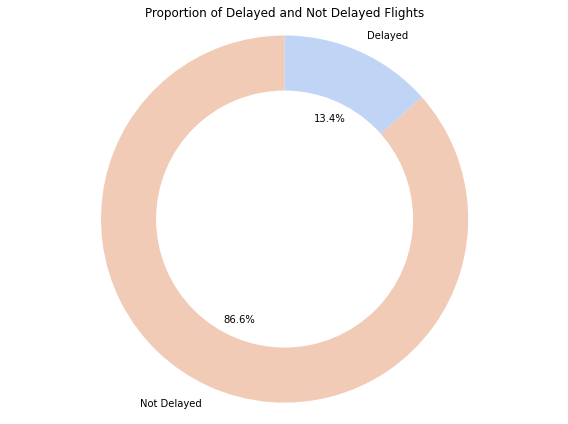

In [18]:
# Calculate delay counts
delay_counts = df['IS_DELAY'].value_counts()

# Create a donut plot with 'coolwarm' colormap
plt.figure(figsize=(8, 6))
plt.pie(delay_counts, labels=['Not Delayed', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=plt.cm.coolwarm([0.6, 0.4]))
plt.title('Proportion of Delayed and Not Delayed Flights')
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.show()


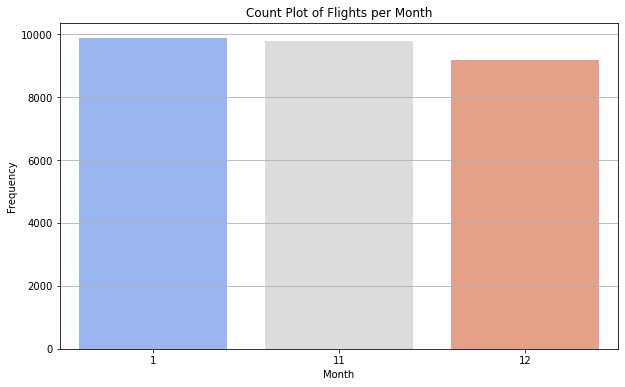

In [19]:
#number of flights that occurred in a particular month
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Count Plot of Flights per Month')
plt.grid(axis='y')
plt.show()


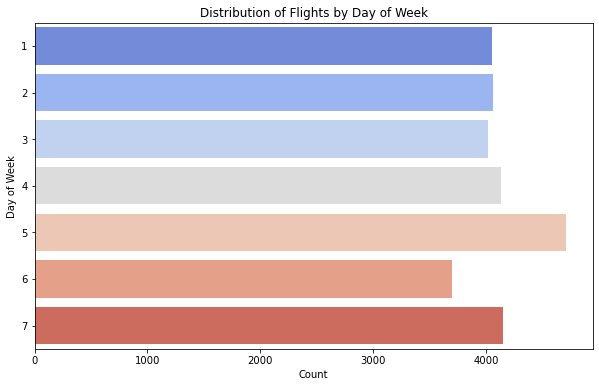

In [20]:
# Plot bar chart of DAY_OF_WEEK distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='DayOfWeek', data=df, palette='coolwarm')
plt.title('Distribution of Flights by Day of Week')
plt.xlabel('Count')
plt.ylabel('Day of Week')
plt.show()


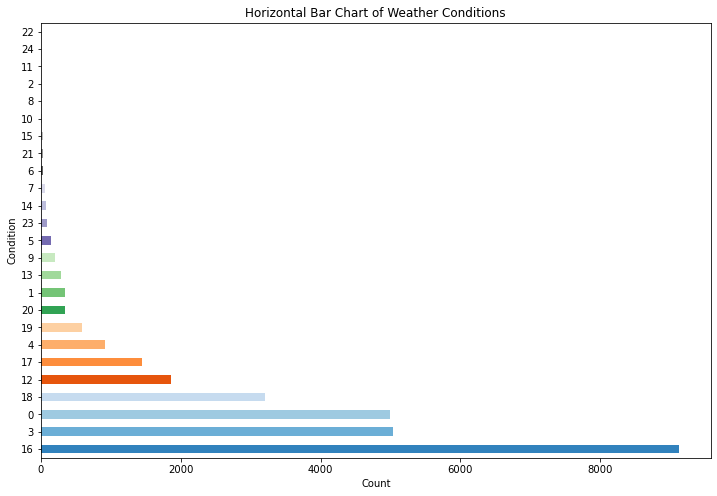

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df['WeatherCondition'].value_counts().plot(kind='barh', color=plt.cm.tab20c.colors)
plt.title('Horizontal Bar Chart of Weather Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()


<h3><b> Build the model : </h3></b>

* Feature Selection
* Model Selection (lazypredict) 
* split the data 
* Train and Test the model
* confusion matrix


*  <b> Feature Selection  </b>

In [82]:
# Split dataset into features and target variable
X = df.drop(['IS_DELAY', 'DepartureDelay'], axis=1)
y = df['IS_DELAY']

In [83]:
# Initialize and train the ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to associate features with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                      Feature  Importance
7      ScheduledDepartureTime    0.138555
8         ActualDepartureTime    0.131775
9        ScheduledArrivalTime    0.087104
5        ScheduledJourneyTime    0.065985
6                    Distance    0.059058
20                TaxiOutTime    0.058969
4                 Destination    0.057413
3                     Carrier    0.051335
19    ScheduledArrivalFlights    0.047006
18  ScheduledDepartureFlights    0.044914
16                   Pressure    0.031868
10                Temperature    0.028087
11                   DewPoint    0.027023
14                  WindSpeed    0.026970
12                   Humidity    0.026495
13              WindDirection    0.023580
1                  DayOfMonth    0.023073
17           WeatherCondition    0.021012
2                   DayOfWeek    0.020292
0                       Month    0.017949
15                   WindGust    0.011538


In [84]:
# Print the first 6 important features
print("Top 6 important features:")
top_imoprtant=feature_importance_df.head(6)
print(top_imoprtant)

Top 6 important features:
                   Feature  Importance
7   ScheduledDepartureTime    0.138555
8      ActualDepartureTime    0.131775
9     ScheduledArrivalTime    0.087104
5     ScheduledJourneyTime    0.065985
6                 Distance    0.059058
20             TaxiOutTime    0.058969


In [85]:
top_imoprtant['Feature']

7     ScheduledDepartureTime
8        ActualDepartureTime
9       ScheduledArrivalTime
5       ScheduledJourneyTime
6                   Distance
20               TaxiOutTime
Name: Feature, dtype: object

*  <b> split the data   </b>

In [86]:
features = feature_importance_df['Feature']
target = 'IS_DELAY'

#split the data into features (X) and target variable (y)
X = df[features]
y = df[target]
 
#split the data into training (80%) and temporary set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [87]:
# Shape of training data
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)  

# Shape of test data
print("X_test shape:", X_test.shape)    
print("y_test shape:", y_test.shape)  

X_train shape: (23054, 21)
y_train shape: (23054,)
X_test shape: (5764, 21)
y_test shape: (5764,)


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      28818 non-null  int64  
 1   DayOfMonth                 28818 non-null  int64  
 2   DayOfWeek                  28818 non-null  int64  
 3   Carrier                    28818 non-null  int32  
 4   Destination                28818 non-null  int32  
 5   DepartureDelay             28818 non-null  int64  
 6   ScheduledJourneyTime       28818 non-null  int64  
 7   Distance                   28818 non-null  int64  
 8   ScheduledDepartureTime     28818 non-null  int64  
 9   ActualDepartureTime        28818 non-null  int64  
 10  ScheduledArrivalTime       28818 non-null  int64  
 11  Temperature                28818 non-null  int64  
 12  DewPoint                   28818 non-null  int32  
 13  Humidity                   28818 non-null  int64  


*  <b> Train and Test the model   </b>

<b>RandomForest</b>

In [36]:
# Train Random Forest Classifier

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)
 
# Make predictions

y_pred = clf.predict(X_test)
 
# Evaluate model

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.9122137404580153
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4973
           1       0.93      0.39      0.55       791

    accuracy                           0.91      5764
   macro avg       0.92      0.69      0.75      5764
weighted avg       0.91      0.91      0.90      5764



In [37]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

Precision: 0.9279279279279279
Recall: 0.3906447534766119
F1 Score: 0.5498220640569395


<b>DecisionTree</b>

In [89]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=None , random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9684247050659265
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4967
           1       0.89      0.88      0.88       797

    accuracy                           0.97      5764
   macro avg       0.94      0.93      0.93      5764
weighted avg       0.97      0.97      0.97      5764



In [63]:
# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create the decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=4)
# Instantiate GridSearchCV
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, n_jobs=-1)
# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [39]:
from sklearn.metrics import precision_score, recall_score
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

Precision: 0.9224598930481284
Recall: 0.8723135271807838
F1 Score: 0.8966861598440545


<b>LogisticRegression</b>

In [40]:
# Initialize Logistic Regression Classifier
clf = LogisticRegression(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8645038167938931
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      4973
           1       0.81      0.02      0.03       791

    accuracy                           0.86      5764
   macro avg       0.84      0.51      0.48      5764
weighted avg       0.86      0.86      0.80      5764



In [41]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

Precision: 0.8125
Recall: 0.01643489254108723
F1 Score: 0.0322180916976456


*  <b> Confusion matrix   </b>

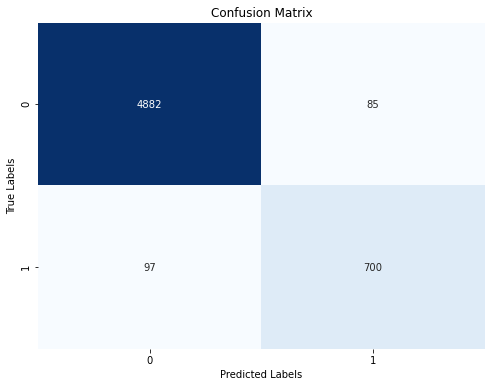

In [90]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


*  <b> GUI   </b>

In [54]:
df=pd.read_csv('M1_final.csv')

In [ ]:
import tkinter as tk
from tkinter import ttk
def show_data():
    # Get the selected month
    selected_month = month_var.get()
    selected_day_of_month = int(day_of_month_entry.get())
    selected_day_of_week = int(day_of_week_entry.get())

    # Filter the data based on the selected month, day of month, and day of week
    filtered_df = df[(df["MONTH"] == selected_month) & 
                     (df["DAY_OF_MONTH"] == selected_day_of_month) &
                     (df["DAY_OF_WEEK"] == selected_day_of_week)]

    # Determine if any flight on that day was delayed or not based on the departure delay
    delayed_flights = filtered_df[filtered_df["DEP_DELAY"] > 15]
    
    if not delayed_flights.empty:
        delayed_tail_numbers = delayed_flights["TAIL_NUM"].tolist()
        result_label.config(text="Flight Delayed. Tail Numbers:")
        for tail_number in delayed_tail_numbers:
            result_label.config(text=result_label.cget("text") + f"\n{tail_number}")
    else:
        result_label.config(text="No delayed flights on selected day")

# Create the main window
root = tk.Tk()
root.title("Flight Data GUI")
root.geometry("1000x1000")  # Set the size of the window

# Label for the month
month_label = ttk.Label(root, text="Month:")
month_label.pack()

# Radio buttons for selecting the month
month_var = tk.IntVar()
month_var.set(11)  # Default to November
month_frame = ttk.Frame(root)
month_frame.pack()
for month in [11, 12, 1]:
    ttk.Radiobutton(month_frame, text=str(month), variable=month_var, value=month).pack(side="left")

# Inputs for day of the month and day of the week
day_of_month_label = ttk.Label(root, text="Day of Month:")
day_of_month_label.pack()
day_of_month_entry = ttk.Entry(root)
day_of_month_entry.pack()

day_of_week_label = ttk.Label(root, text="Day of Week:")
day_of_week_label.pack()
day_of_week_entry = ttk.Entry(root)
day_of_week_entry.pack()

# Button to show data
show_data_button = ttk.Button(root, text="Show Data", command=show_data)
show_data_button.pack()

# Label to display the result
result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()
